In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_df = pd.merge(ride_data, city_data, on="city", how="left")


# Display the data table for preview
city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

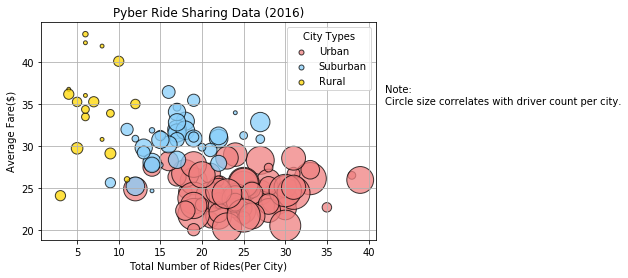

In [3]:
# Obtain the x and y coordinates for each of the three city types

urban_df = city_df[city_df["type"]=="Urban"]
suburban_df = city_df[city_df["type"]=="Suburban"]
rural_df = city_df[city_df["type"]=="Rural"]

urban_df_bycity = urban_df.groupby(["city"])
suburban_df_bycity = suburban_df.groupby(["city"])
rural_df_bycity = rural_df.groupby(["city"])
urban_df_bycity.count().head(10)

x_urban = urban_df_bycity["ride_id"].count()
x_suburban = suburban_df_bycity["ride_id"].count()
x_rural = rural_df_bycity["ride_id"].count()

y_urban = urban_df_bycity["fare"].mean()
y_suburban = suburban_df_bycity["fare"].mean()
y_rural = rural_df_bycity["fare"].mean()

s_urban = urban_df_bycity["driver_count"].mean()
s_suburban = suburban_df_bycity["driver_count"].mean()
s_rural = rural_df_bycity["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s_urban*15, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75, label = "Urban")
plt.scatter(x_suburban, y_suburban, s_suburban*15, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label = "Suburban")
plt.scatter(x_rural, y_rural, s_rural*15, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Set a grid on the plot
plt.grid()

# Create a legend
legend = plt.legend(title = "City Types", loc="best")
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]
                                 
# Incorporate a text label regarding circle size
plt.text(42,35,'Note: \nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("plots/bubbleplot.png", bbox_inches="tight")




In [6]:
# Show plot
plt.show()

## Total Fares by City Type

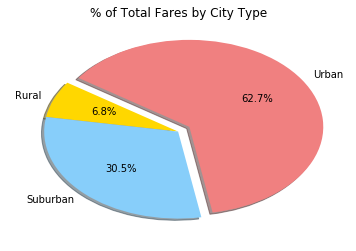

In [7]:
# Calculate Type Percents
citytype_total = city_df["type"].count()
citytype_total
cityfare_urban = urban_df["fare"].sum()/citytype_total
cityfare_urban
cityfare_suburban = suburban_df["fare"].sum()/citytype_total
cityfare_suburban
cityfare_rural = rural_df["fare"].sum()/citytype_total
cityfare_rural

# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
sizes = [cityfare_urban, cityfare_rural, cityfare_suburban]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("plots/totalfaresbyCityType.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

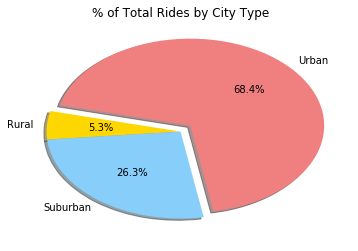

In [9]:
# Calculate Ride Percents
citytype_total = city_df["ride_id"].count()
citytype_total
cityrides_urban = urban_df["ride_id"].count()/citytype_total
cityrides_urban
cityrides_suburban = suburban_df["ride_id"].count()/citytype_total
cityrides_suburban
cityrides_rural = rural_df["ride_id"].count()/citytype_total
cityrides_rural
# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
colors = ["lightcoral", "gold", "lightskyblue"]
sizes = [cityrides_urban, cityrides_rural, cityrides_suburban]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("plots/totalridesbyCityType.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

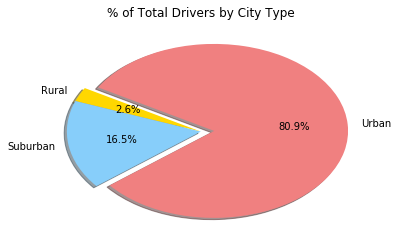

In [12]:
# Calculate Driver Percents
citytype = city_data.groupby(["type"])
driver_citytype = citytype["driver_count"].sum()

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(driver_citytype, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

          
# plt.title("% of Total Drivers by City Type")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("plots/totaldriversbyCityType.png")

In [11]:
# Show Figure
plt.show()

Observable trends: 
1.The bubble plot shows that the urban cities have the most number of rides but lower average fares. Urban cities mostly have large driver counts.It can be deduced that the availability of more drivers in urban cities results in competitive lower fares for the rider. There are some cities where the demand for rides is high and the driver count is low. Despite the low driver count, the average fare for these cities is low which signifies this to be a strategic move by Pyber to avoid losing riders to other competitors.
2.From pie charts 1 and 2, we can conclude that total fares is poportionally related to total rides.
3.Urban cities have lower average fares but account for 62.7% of total fares. This is can attributed to the increased ride demand(68.4 % for urban cities as seen in the % of Total rides by City Type plot) and large driver counts(80.9 % for urban cities as seen in the % of Total Drivers by City Type plot) in the urban cities. 